# SAT model

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('sat.txt', sep = ' ')
data.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
y = data.loc[:,['univ_GPA']]
X = data.drop('univ_GPA', axis =1)

In [39]:
X_scaled = scaler.fit_transform(X)

### Строим зависимость univ_GPA от high_GPA

В итоге необходимо получить что-то вроде такого:

In [7]:
from sklearn.linear_model import LinearRegression

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [43]:
model = LinearRegression()
model.fit(x_train, y_train)
y_test_predict = model.predict(x_test)

model.score(x_test,y_test)

0.9047242916393627

In [53]:
from sklearn.metrics import r2_score
print('R2 score: {}'.format(r2_score(y_test, y_test_predict)))
print('coefs: {}'.format(model.coef_))
print('intercept: {}'.format(model.intercept_))

R2 score: 0.9047242916393627
coefs: [[ 0.06277833 -0.03845535  0.05496778  0.34156031]]
intercept: [3.18287397]


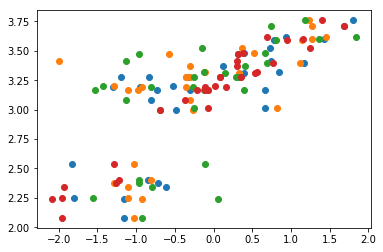

In [60]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test[:,2], y_test_predict, 'k-')
plt.show()

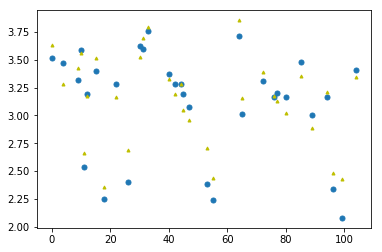

In [61]:
plt.plot(y_test.index, y_test, 'o', markersize = 5)
plt.plot(y_test.index, y_test_predict, 'y^', markersize = 3)
plt.show()